In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# text files with the output of tov_metric.bin and tov_structure.bin
structure_file = "structure.dat"
metric_file = "metric.dat"

## First theoretical approach to the equation of state

Calculations of the values available in the input files.

*Warning:* a neutron gas is a very bad approximation to a neutron star! Only use for teaching purposes, as a first approach that yields only qualitative results. The BU0 model is a somewhat more realistic approach.

In [3]:
class SI: pass
SI.G = 6.67e-11 # N m^2 kg^-2
SI.c = 3e8 # m/s
SI.mn = 1.67e-27 # kg
SI.me = 9e-31 # kg
SI.hbar = 1.054e-34 # J s
SI.km = 1e3 # m
SI.Msun = 1.988e30 # kg

In [4]:
# Pressure = K * density ** Gamma = K * (number_density*neutron_mass) ** Gamma

print("Relativistic neutron gas, Gamma = 4/3")
K_relativistic_SI = ( 2*np.pi/3 * (3/(8*np.pi))**(4/3) * 2*np.pi )*SI.hbar*SI.c/(SI.mn)**(4/3)
K_relativistic_geom = (K_relativistic_SI * SI.c**(-2) * (SI.G/SI.c**2)**(-1/3))/(SI.km**(2/3))
print(f" K for the relativistic gas = {K_relativistic_SI:e} [SI] = {K_relativistic_geom} [km^(2/3)]")

Relativistic neutron gas, Gamma = 4/3
 K for the relativistic gas = 1.234299e+10 [SI] = 1.5154791365023463 [km^(2/3)]


In [5]:
print("Non-relativistic neutron gas, Gamma = 4/3")
K_nonRelativistic_SI = ( 8*np.pi/15 * (3/(8*np.pi))**(5/3) * (2*np.pi)**2 )\
        * SI.hbar**2 * 1/(SI.mn) * 1/(SI.mn)**(5/3)
K_nonRelativistic_geom = (K_nonRelativistic_SI * SI.c**(-2)*(SI.G/SI.c**2)**(-2/3))/(SI.km**(4/3))
print(f" K for the non-Relativistic gas = {K_nonRelativistic_SI:e} [SI] = {K_nonRelativistic_geom} [km^(2/3)]")

Non-relativistic neutron gas, Gamma = 4/3
 K for the non-Relativistic gas = 5.416864e+03 [SI] = 7.34936644215657 [km^(2/3)]


## Internal structure of the neutron star

In [6]:
structure_dtype = np.dtype([("r",float), ("m", float), ("p", float), ("rho", float)])
structure = np.loadtxt(structure_file, dtype=structure_dtype)

Text(0, 0.5, '$\\rho$ [g/cm$^3$]')

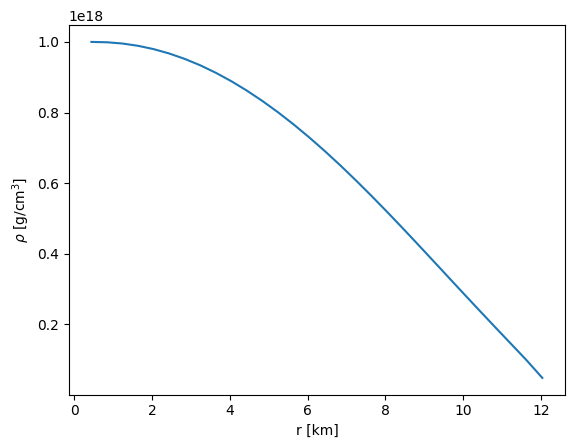

In [7]:
plt.plot(structure["r"], structure["rho"])
plt.xlabel("r [km]")
plt.ylabel(r"$\rho$ [g/cm$^3$]")

Text(0, 0.5, '$p$ [Pa]')

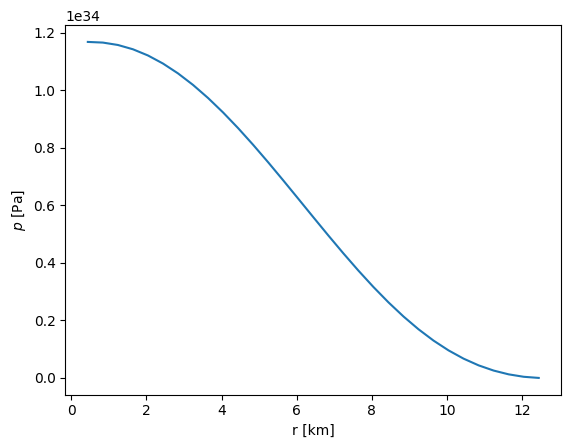

In [8]:
plt.plot(structure["r"], structure["p"])
plt.xlabel("r [km]")
plt.ylabel(r"$p$ [Pa]")

## Radius and mass of the neutron star

In [9]:
structure_dtype = np.dtype([("r",float), ("m", float), ("p", float), ("rho", float)])
structure = np.loadtxt(structure_file, dtype=structure_dtype)

The (circumferential) radius of a neutron star is defined as $R = \mathcal C/(2\pi)$, where $C = \oint d\ell_\phi = \int_0^{2\pi} \sqrt{g_{\phi\phi}}d\phi$ = $\int_0^{2\pi} r\sin\theta d\phi = 2\pi r$ ($\theta$ is evaluated at the midplane). In the case of a non-rotating neutron star, the value of $r$ when $p=0$ is the same as the circumferential radius. For a rotating neutron star, the $g_{\phi\phi}$ is not simply $r\sin\theta$ anymore, so the circumferential radius and the coordinate $r$ are not necessarily the same.

In [10]:
radius_index = np.where(structure["rho"]>0)[0][-1]
radius = structure["r"][radius_index]
print(rf"Radius of the neutron star = {radius} km")

Radius of the neutron star = 12.0399971 km


The mass that an observer at infinity detects is M = m(R). This is different than the proper mass (see below).

In [11]:
mass = structure["m"][radius_index]
print(rf"Mass of the neutron star = {mass} Msun")

Mass of the neutron star = 1.4282738 Msun


## Metric components of the neutron star

In [12]:
metric_dtype = np.dtype([("r",float), ("Phi", float), ("g_tt", float), ("g_rr", float)])
metric = np.loadtxt(metric_file, dtype=metric_dtype)

Text(0, 0.5, 'metric')

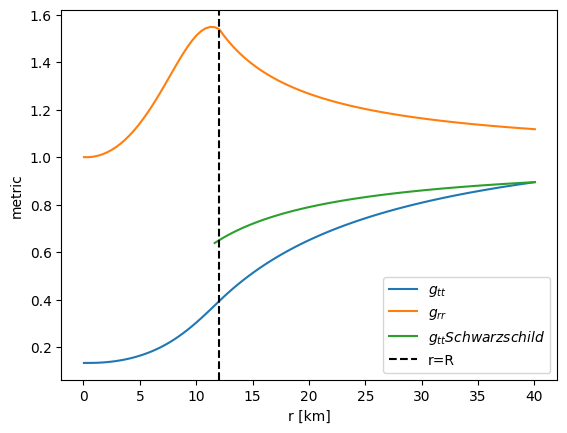

In [13]:
plt.plot(metric["r"], metric["g_tt"], label=r"$g_{tt}$")
plt.plot(metric["r"], metric["g_rr"], label=r"$g_{rr}$")

code_unit_mass = SI.km*SI.c**2/(SI.G*SI.Msun)
mass_geom = mass/code_unit_mass
g_tt_Schw = 1 - 2*mass_geom/metric["r"]
plt.plot(metric["r"][radius_index:], g_tt_Schw[radius_index:], label=r"$g_{tt} Schwarzschild$")
plt.axvline(radius, color="black", ls="--",label="r=R")
plt.legend()
plt.xlabel("r [km]")
plt.ylabel("metric")

## Proper mass of the neutron star

In [14]:
rho_in = structure["rho"][:radius_index+1]
r_in = structure["r"][:radius_index+1]*SI.km
dr = np.diff(r_in)[0] # regular equispaced grid
g_rr_in = np.abs(metric["g_rr"][:radius_index+1])
M_p = 4*np.pi * np.sum( r_in**2 * rho_in * np.sqrt(g_rr_in) *  dr ) / SI.Msun
print(rf"Proper mass = {M_p} Msun")

Proper mass = 1.6510669860066869 Msun


Binding energy: difference between the proper mass and the effective mass

In [15]:
M_p - mass

0.22279318600668696